In [1]:
from tree_detection_framework.detection.region_detections import RegionDetections
import shapely
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import copy

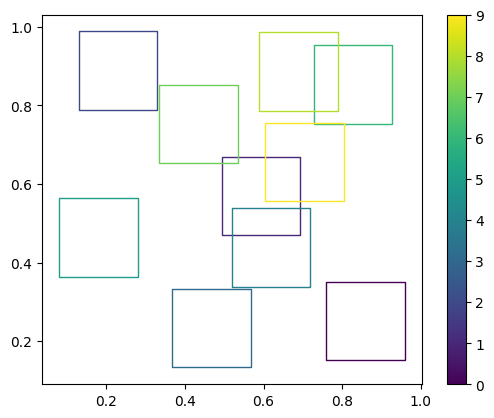

centroids: 0    POINT (0.859 0.251)
1     POINT (0.594 0.57)
2     POINT (0.23 0.888)
3    POINT (0.468 0.233)
4    POINT (0.619 0.438)
5     POINT (0.18 0.464)
6    POINT (0.828 0.853)
7    POINT (0.434 0.752)
8    POINT (0.689 0.887)
9    POINT (0.704 0.655)
Name: centroids, dtype: geometry
geometry: 0    POLYGON ((0.959 0.151, 0.959 0.351, 0.759 0.35...
1    POLYGON ((0.694 0.47, 0.694 0.67, 0.494 0.67, ...
2    POLYGON ((0.33 0.788, 0.33 0.988, 0.13 0.988, ...
3    POLYGON ((0.568 0.133, 0.568 0.333, 0.368 0.33...
4    POLYGON ((0.719 0.338, 0.719 0.538, 0.519 0.53...
5    POLYGON ((0.28 0.364, 0.28 0.564, 0.08 0.564, ...
6    POLYGON ((0.928 0.753, 0.928 0.953, 0.728 0.95...
7    POLYGON ((0.534 0.652, 0.534 0.852, 0.334 0.85...
8    POLYGON ((0.789 0.787, 0.789 0.987, 0.589 0.98...
9    POLYGON ((0.804 0.555, 0.804 0.755, 0.604 0.75...
Name: geometry, dtype: geometry


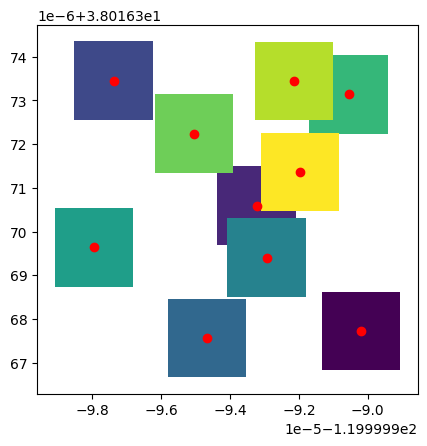

In [ ]:
# Create a dataframe
tl = np.random.random((10, 2)) * 0.8
br = tl + 0.2
boxes = gpd.GeoSeries(shapely.box(tl[:, 0], tl[:, 1], br[:, 0], br[:, 1]), crs=3310)
# Create an arbitrary data column
data_col = np.arange(len(boxes))
# Create a geoseries of the centroid of each box
centroids = boxes.centroid

# Create an RD object that specifies that the centroids and geometry columns are geometric
rd = RegionDetections(
    detection_geometries = boxes,
    data={"centroids": centroids, "data_col": data_col},
    input_in_pixels=False,
    geometry_columns=["centroids", "geometry"]
)

# Show the active geometry (the boxes)
rd.plot(visualization_column="data_col")

# Get both the boxes and the centroids in 4326
gdf_transformed = rd.get_data_frame(4326)

# Show the transformed result
f, ax = plt.subplots()
gdf_transformed.plot("data_col", ax=ax)
gdf_transformed["centroids"].plot(ax=ax, c="r")
plt.show()
display(gdf_transformed)